In [1]:
import pandas as pd        # for data manipulation
import numpy as np         # for mathematical calculations
import seaborn as sns      # for data visualization

import matplotlib.pyplot as plt  #for graphical analysis
%matplotlib inline

from scipy.stats import zscore # to remove outliers

from sklearn.preprocessing import StandardScaler  # for normalize the model

from sklearn.model_selection import train_test_split  # for train and test model

import warnings                      # to ignore any warnings
warnings.filterwarnings("ignore")

from sklearn import metrics  # for model evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, confusion_matrix, classification_report


In [2]:
data=pd.read_csv('baseball.csv')  # read the data
data.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [3]:
data.shape # check the no. of rows & column

(30, 17)

In [4]:
data.isna().sum() #finding the count of missing value

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [5]:
data.info() #printing the summary of data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [6]:
data.drop_duplicates(inplace=True) #remove duplicates if any

In [7]:
data.shape

(30, 17)

In [8]:
data.describe()   #understand data at high level check the stastics of dataset

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


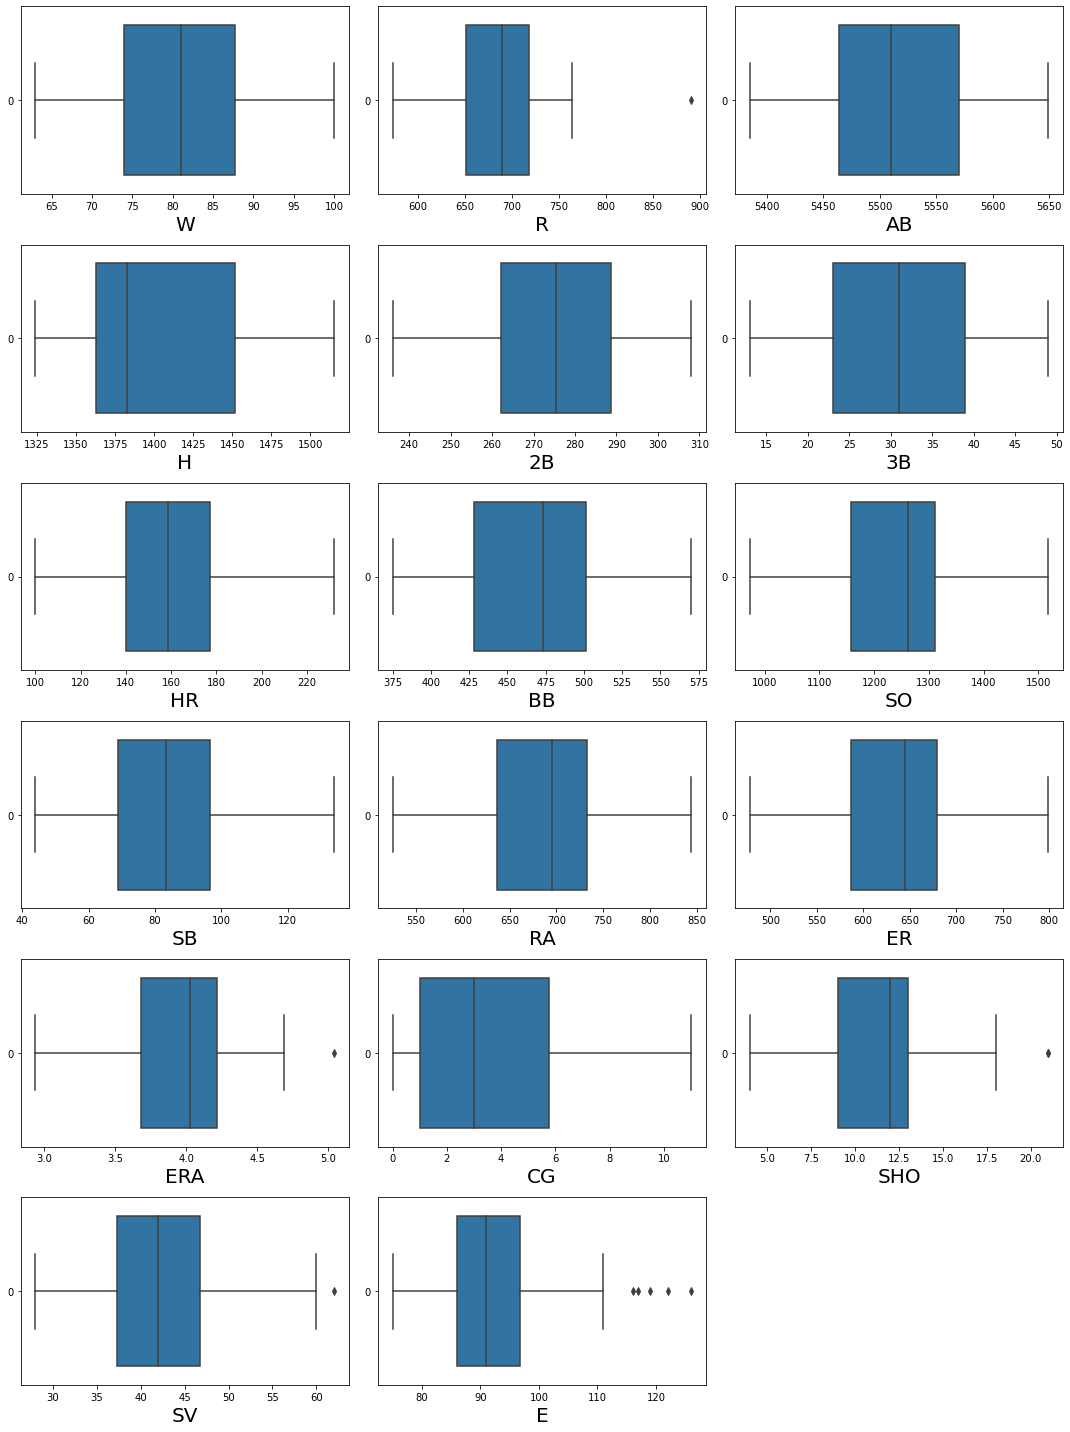

In [9]:
#Let's see the how data is distributed or Graphical analysis
plt.figure(figsize=(15,20))
plotnumber=1
for column in data:
    if plotnumber<=20:
        ax=plt.subplot(6,3,plotnumber)
        sns.distplot(data=data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [ ]:
# As we can see there are few data for columns E,SV, SHO,CG,SO,SB,RA,HR, BB ,R,& H has skewness,lets deal with it.

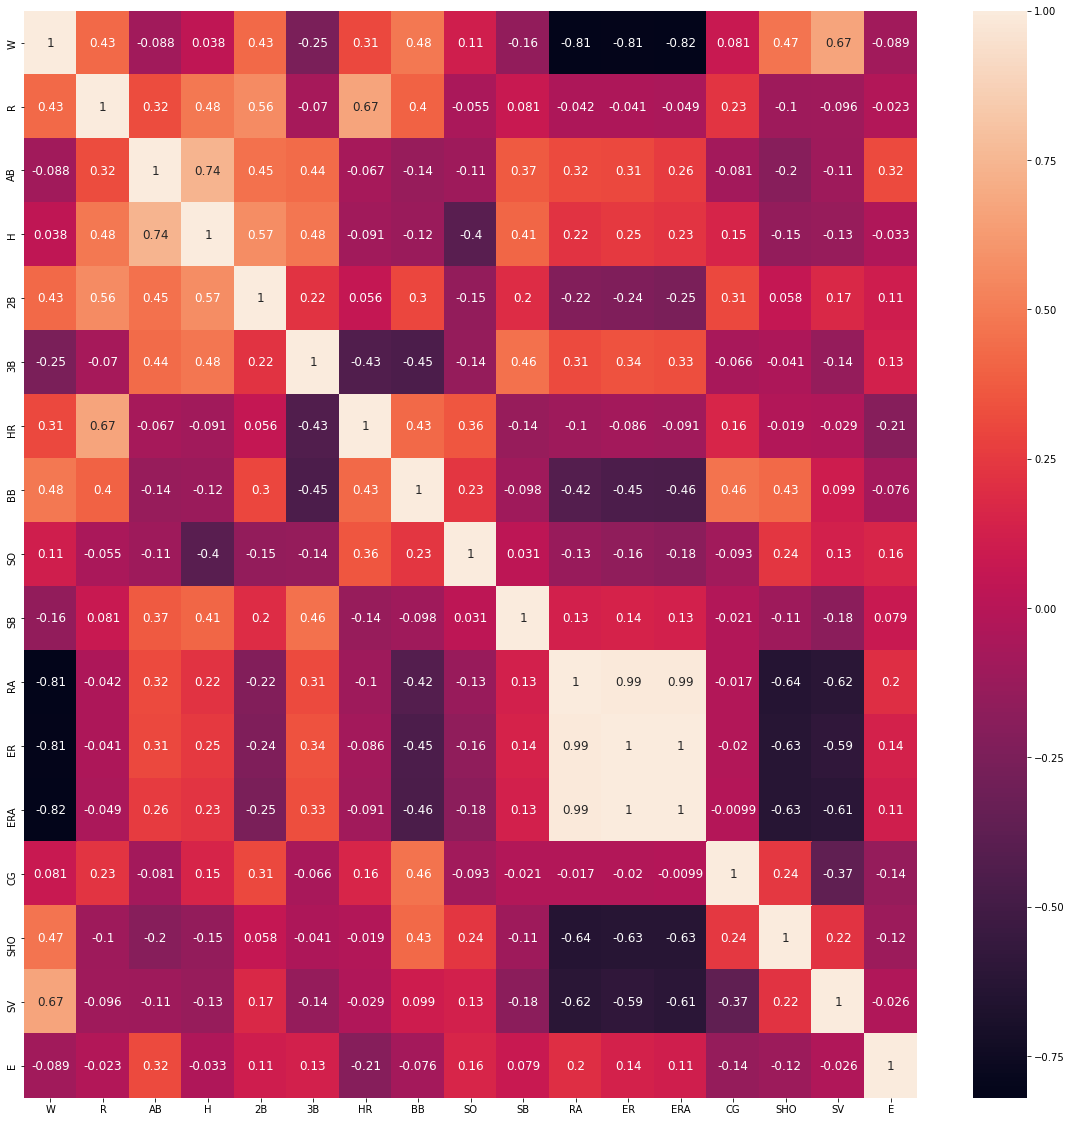

In [10]:
#check multicolinearity 
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True,annot_kws={'size':12})
plt.show()

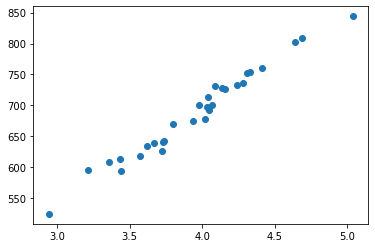

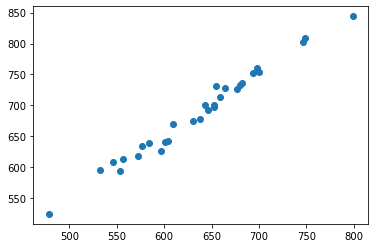

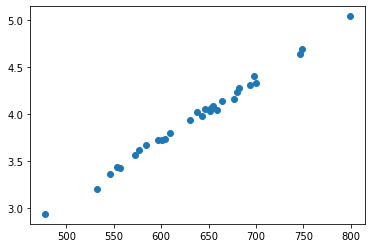

In [11]:
# As we see there is multicolinarity present in the columns ER, ERA, RA
plt.scatter(data.ERA,data.RA)
plt.show()

plt.scatter(data.ER,data.RA)
plt.show()

plt.scatter(data.ER,data.ERA)
plt.show()

In [12]:
#looking at distribution its clear there is linear cor-relationship in ERA, ER & RA so, droping one of them.
data=data.drop(columns=["ER","RA"])
print(data.columns)


Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'ERA', 'CG',
       'SHO', 'SV', 'E'],
      dtype='object')


In [16]:
#Let's remove outliers from above columns
z_score=zscore(data)
abs_z_score=np.abs(z_score)
filtering_entry=(abs_z_score<3).all(axis=1)
data=data[filtering_entry]

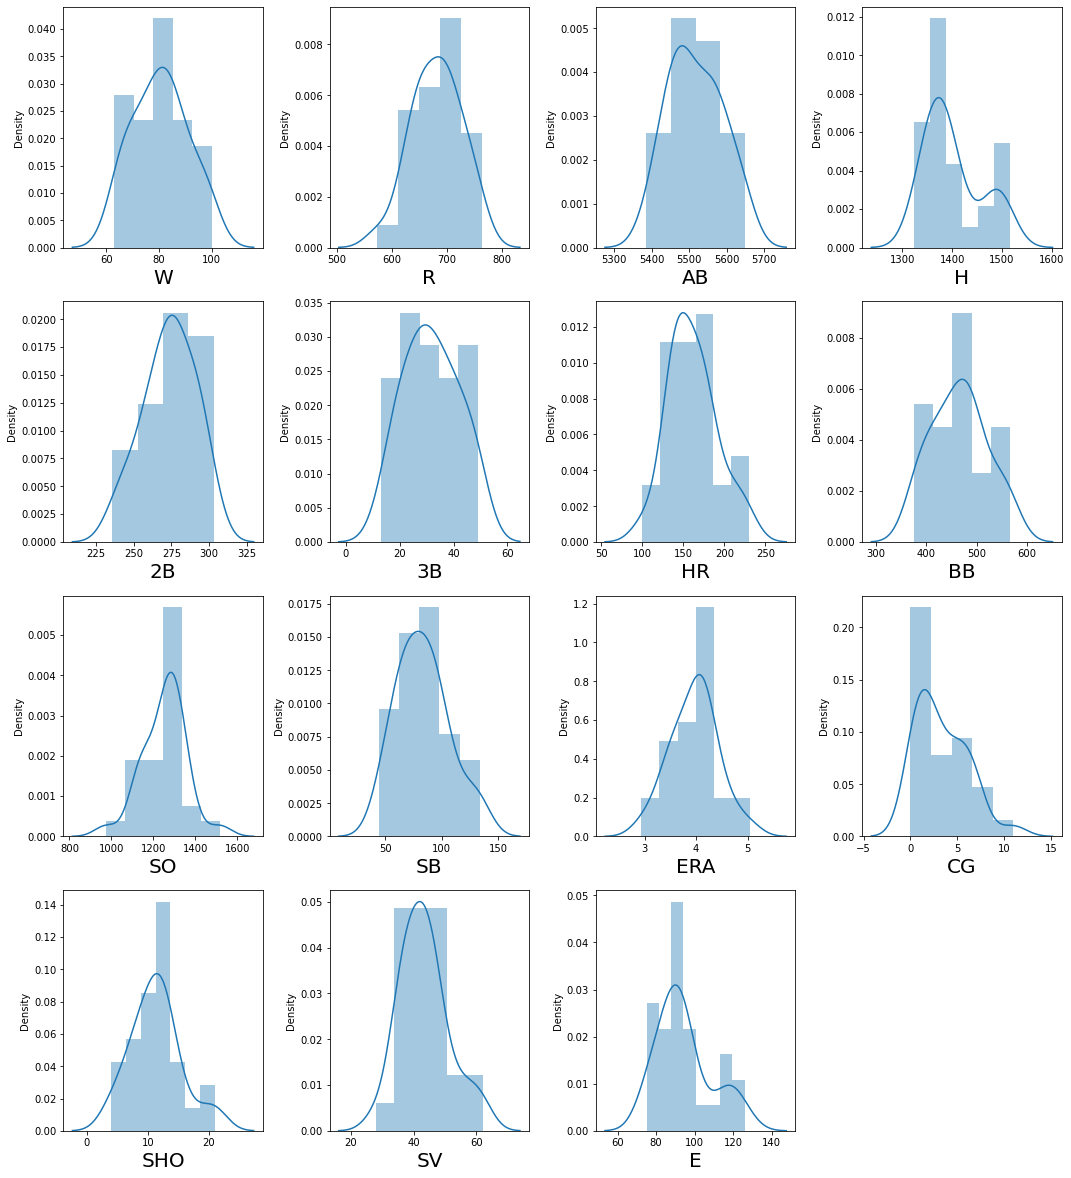

In [19]:
#lets check graph/distribusion after removing outliers
plt.figure(figsize=(15,20))
plotnumber=1
for column in data:
    if plotnumber<=20:
        ax=plt.subplot(5,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [21]:
#still we can see some outliers in H,SHO & SV lets remove it
q1=data.quantile(0.25)
q3=data.quantile(0.75)
iqr=q3-q1

H_H=(q3.H+(1.5*iqr.H))
SHO_H=(q3.SHO+(1.5*iqr.SHO))
SV_H=(q3.SV+(1.5*iqr.SV))


In [28]:
Index=np.where(data['H']>H_H)
print(Index)
data=data.drop(data.index[Index])
data.shape

(array([], dtype=int64),)


(26, 15)

In [29]:
Index=np.where(data['SHO']>SHO_H)
print(Index)
data=data.drop(data.index[Index])
data.shape

(array([], dtype=int64),)


(26, 15)

In [31]:
Index=np.where(data['SV']>SV_H)
print(Index)
data=data.drop(data.index[Index])
data.shape

(array([13], dtype=int64),)


(25, 15)

In [35]:
# Let's Seperate the data & visulize the relation between featurs & lable
x=data.drop(columns=['W'])
y=data['W']

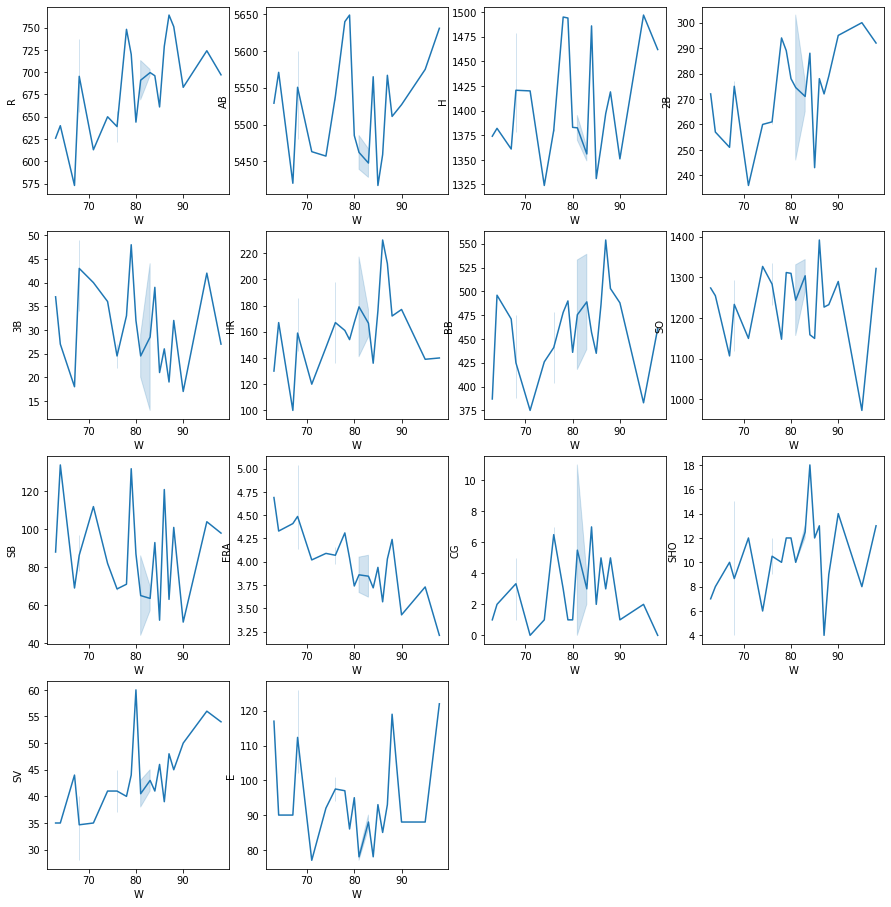

In [36]:
plt.figure(figsize=(15,20))
plotnumber=1
for column in x:
    if plotnumber<=20:
        ax=plt.subplot(5,4,plotnumber)
        sns.lineplot(y,x[column])
    plotnumber+=1
plt.show()

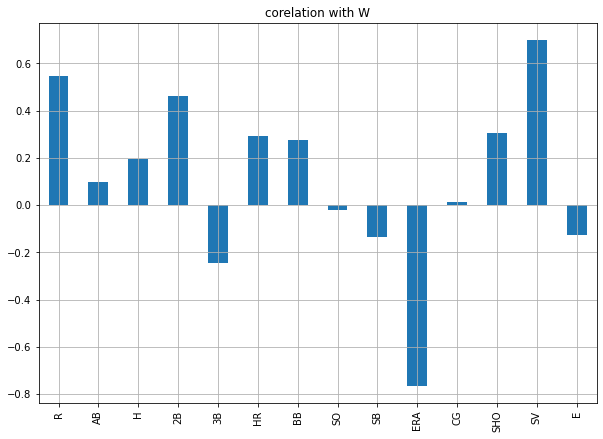

In [37]:
data.drop('W',axis=1).corrwith(data.W).plot(kind='bar',grid=True,figsize=(10,7),title="corelation with W")
plt.show()

In [38]:
# Divide data set into featurs & lable
x=data.drop(columns=['W'])
y=data['W']

In [39]:
# data stadardization
scale=StandardScaler()
x_scaled=scale.fit_transform(x)

In [40]:
#Split data into train & test
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=40)

In [41]:
# Model Traing by using diffrent algorithms

from sklearn.linear_model import LinearRegression, Ridge, Lasso, LassoCV, RidgeCV

In [42]:
# Model no.1
lcv=LassoCV(alphas=None,max_iter=100,normalize=True)
lcv.fit(x_train,y_train)

alpha=lcv.alpha_
print(alpha)

Lasso_reg=Lasso(alpha).fit(x_train,y_train)

Lasso_reg.score(x_train,y_train)

0.05071458888289403


0.9735362667202838

In [43]:
Lasso_reg.score(x_test,y_test)

0.5244976733085023

In [44]:
y_pred=lcv.predict(x_test)


np.sqrt(mean_squared_error(y_test,y_pred))

4.991331830547436

In [45]:
# Model no.2
rcv=RidgeCV(alphas=0.05,normalize=True)
rcv.fit(x_train,y_train)

alpha=rcv.alpha_
print(alpha)

Ridge_reg=Ridge(alpha).fit(x_train,y_train)

Ridge_reg.score(x_train,y_train)

0.05


0.9929756168498833

In [46]:
Ridge_reg.score(x_test,y_test)

0.6018602149907224

In [47]:
y_pred=rcv.predict(x_test)
np.sqrt(mean_squared_error(y_test,y_pred))

7.330238194801682

In [48]:
# Model no.3
lr=LinearRegression()
lr.fit(x_train,y_train)

lr.score(x_train,y_train)

0.9991920270702394

In [49]:
lr.score(x_test,y_test)

0.5613698463755953

In [50]:
y_pred=lr.predict(x_test)
np.sqrt(mean_squared_error(y_test,y_pred))

7.12348411224615

In [51]:
# Model no.4
from xgboost import XGBRegressor

In [52]:
xgb=XGBRegressor()
xgb.fit(x_train,y_train)

y_pred=xgb.predict(x_train)

r2_score(y_train,y_pred)

0.9999999966190157

In [53]:
y_test_pred=xgb.predict(x_test)

r2_score(y_test,y_test_pred)

0.37187199076887434

In [54]:
#Model no.5
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor()

ada.fit(x_train,y_train)

y_pred=ada.predict(x_train)

r2_score(y_train,y_pred)

0.9921233523738785

In [55]:
y_test_pred=ada.predict(x_test)

r2_score(y_test,y_test_pred)

0.31017428833589955

In [56]:
# Hyper tuning by using GridSearchCV
from sklearn.model_selection import GridSearchCV

para={'max_depth':range(0,12,2),'learning_rate':[0.25,0.1,0.01,0.05],'n_estimators':[20,10,30,50,70]}
grid=GridSearchCV(estimator=xgb, param_grid=para,cv=5)
grid.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    callbacks=None, colsample_bylevel=1,
                                    colsample_bynode=1, colsample_bytree=1,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=0, gpu_id=-1, grow_policy='depthwise',
                                    importance_type=None,
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_bin=256,
                                    max_cat_to_onehot=4, max_delta_step=0,
                                    max_depth=6, max_leaves=0,
                                    min_child_weight=1, missing=nan,
                                    monotone_constraints='()', n_estimators=100,
                                    n_jobs=0, num_p

In [57]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 50}

In [85]:
xgb=XGBRegressor(learning_rate= 0.22, max_depth=4,n_estimators=50)
xgb.fit(x_train,y_train)

y_pred=xgb.predict(x_test)

r2_score(y_test,y_pred)

0.5502846428372523

In [86]:
y_pred=xgb.predict(x_train)

r2_score(y_train,y_pred)

0.9999633986900741

In [88]:
# Hyper tuning by using RandomizedSearchCV With ADA Boost
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor

dt=DecisionTreeRegressor()
para={'n_estimators':range(0,100,4),'learning_rate':[0.25,0.1,0.01,0.05]}
rand=RandomizedSearchCV(estimator=ada, cv=5,param_distributions=para)
rand.fit(x_train,y_train)

rand.best_params_

{'n_estimators': 20, 'learning_rate': 0.1}

In [89]:
ada=AdaBoostRegressor(base_estimator=dt,learning_rate=0.1, n_estimators=20)
ada.fit(x_train,y_train)

y_pred=ada.predict(x_test)

r2_score(y_test,y_pred)

0.3581847649918962

In [90]:
y_pred=ada.predict(x_train)

r2_score(y_train,y_pred)

1.0

In [91]:
# Hyper tuning by using RandomizedSearchCV With XGBoost
para={'n_estimators':range(0,100,4),'learning_rate':[0.25,0.1,0.01],'max_depth':range(4,12,2)}
rand=RandomizedSearchCV(estimator=xgb, cv=5,param_distributions=para)
rand.fit(x_train,y_train)

rand.best_params_

{'n_estimators': 40, 'max_depth': 4, 'learning_rate': 0.1}

In [92]:
xgb=XGBRegressor(learning_rate= 0.1, max_depth= 4,n_estimators= 40)
xgb.fit(x_train,y_train)

y_pred=xgb.predict(x_test)

r2_score(y_test,y_pred)

0.383133631797524

In [93]:
y_pred=xgb.predict(x_train)

r2_score(y_train,y_pred)

0.8819292284841721

# Based on R2_score after creating a model i hv selected xgbregressor model with grigsearch cv tuning parameter (55%)